# 1- Creating lists of countries and indicators

### Creating List of Countries and Indicators

- We start by creating a list of 12 countries in America, Europe, and Asia, along with three main macroeconomic indicators: GDP growth rate, inflation rate, and unemployment rate.
- The countries are represented using ISO codes for easy identification in APIs like World Bank.
- The indicators are stored in a dictionary for mapping to human-readable descriptions.

In [5]:
countries = [
    "US", # USA
    "CA", # Canada
    "BR", # Brazil
    "GB",  # UK
    "CH",  # Switzerland
    "DE",  # Germany
    "IT",  # Italy
    "FR",  # France
    "ES",  # Spain
    "CN",  # China
    "JP",  # Japan
    "IN",  # India
]

indicators = {"NY.GDP.MKTP.KD.ZG": "GDP Growth Rate %",
              "FP.CPI.TOTL": "Inflation based on CPI",
              "SL.UEM.TOTL.ZS":"Unemployment Rate %"}

# 2- Fetching macroeconomy data from World Bank

### Fetching Data from World Bank

- We import the `WUB data` library to fetch financial data dynamically.
- A function `fetch_world_bank_data` is created to fetch data based on countries, indicators, and specified start and end dates.
- The data is fetched using `www.data.get_frame` method and then cleaned and processed for visualization.

In [8]:
import wbdata

def fetch_world_bank_date(countries,indicators,start_year='2010',end_year='2023'):
    data = wbdata.get_dataframe(
        indicators,
        countries,
        date=(start_year,end_year)
    )
    data.reset_index(inplace=True)
    data.rename(columns={"date":"Date","country":"Country"}, inplace = True)
    return data

macro_data = fetch_world_bank_date(countries,indicators)
macro_data.tail(14)

,Country,Date,GDP Growth Rate %,Inflation based on CPI,Unemployment Rate %
154,United States,2023,2.542700,139.735794,3.625
155,United States,2022,1.935496,134.211206,3.650
156,United States,2021,5.800206,124.266414,5.349
157,United States,2020,-2.213469,118.690502,8.055
158,United States,2019,2.467038,117.244195,3.669
159,United States,2018,2.966505,115.157303,3.896
160,United States,2017,2.457622,112.411557,4.355
161,United States,2016,1.819451,110.067009,4.869
162,United States,2015,2.945550,108.695722,5.280
163,United States,2014,2.523820,108.566932,6.168


# 3- Fetching stock market data from yahoo finance

### Fetching Stock Market Data from Yahoo Finance

- We import the necessary libraries, `Yahoo Finance` and `Pandas`, to fetch stock market data.
- We create a list of stock market indices for 12 countries to dynamically fetch data.
- A function `fetch_stock_data` is defined to fetch stock market data based on the stock market indices, start date, and end date.

In [10]:
import pandas as pd
import yfinance as yf

stock_indices = {"USA": "^GSPC",  #S&P 500
                 "Canada":"^GSPTSE", #TSX Composite
                 "Brazil": "^BVSP",  # Bovespa
                 "UK": "^FTSE",  # FTSE 100
                 "Switzerland": "^SSMI",  # Swiss Market Index
                 "Germany": "^GDAXI",  # DAX
                 "Italy": "FTSEMIB.MI",  # FTSE MIB
                 "France": "^FCHI",  # CAC 40
                 "Spain": "^IBEX",  # IBEX 35
                 "China": "000001.SS",  # SSE Composite
                 "Japan": "^N225",  # Nikkei 225
                 "India": "^NSEI",  # NIFTY 50
}
                 
def fetch_stock_data(ticker,start_date='2010-01-01',end_date='2023-12-30'): 
    data = yf.download(ticker,start = start_date, end = end_date, interval = '1mo')
    stocks_index = data[['Close']].rename(columns={'Close':ticker})
    stocks_index = stocks_index.reset_index(drop=True)
    return stocks_index

stock_data_frames = {}
for country, ticker in stock_indices.items():
    stock_data_frames[country] = fetch_stock_data(ticker)

stock_data_combined = pd.concat(stock_data_frames, axis = 1)
stock_data_combined.columns = [f"{country}" for country in stock_data_frames.keys()]
stock_data_combined.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,USA,Canada,Brazil,UK,Switzerland,Germany,Italy,France,Spain,China,Japan,India
0,1073.869995,11094.299805,65402.0,5188.500000,6440.720215,5608.790039,21896.0,3739.459961,10947.700195,2989.291992,10198.040039,4882.049805
1,1104.489990,11629.599609,66503.0,5354.500000,6710.990234,5598.459961,21068.0,3708.800049,10333.599609,3051.943115,10126.030273,4922.299805
2,1169.430054,12037.700195,70372.0,5679.600098,6873.370117,6153.549805,22848.0,3974.010010,10871.299805,3109.104980,11089.940430,5249.100098
3,1186.689941,12210.700195,67530.0,5553.299805,6616.819824,6135.700195,21563.0,3816.989990,10492.200195,2870.611084,11057.400391,5278.000000
4,1089.410034,11763.000000,63047.0,5188.399902,6312.600098,5964.330078,19544.0,3507.560059,9359.400391,2592.145996,9768.700195,5086.299805
5,1030.709961,11294.400391,60936.0,4916.899902,6128.060059,5965.520020,19312.0,3442.889893,9263.400391,2398.370117,9382.639648,5312.500000
6,1101.599976,11713.400391,67515.0,5258.000000,6200.779785,6147.970215,21022.0,3643.139893,10499.799805,2637.502930,9537.299805,5367.600098
7,1049.329956,11913.900391,65145.0,5225.200195,6180.890137,5925.220215,19735.0,3490.790039,10187.000000,2638.798096,8824.059570,5402.399902
8,1141.199951,12368.700195,69430.0,5548.600098,6296.330078,6229.020020,20505.0,3715.179932,10514.500000,2655.657959,9369.349609,6029.950195
9,1183.260010,12676.200195,70673.0,5675.200195,6472.229980,6601.370117,21451.0,3833.500000,10812.900391,2978.834961,9202.450195,6017.700195


# 4- Data cleaning and preprocessing

### Data Cleaning and Preprocessing

- A function `clean_preprocess` is created to clean and preprocess the fetched data before visualization.
- Steps include converting date columns to datetime format, removing missing values, sorting data, handling infinite values, and resetting index for a tidy dataset.

In [13]:
#from datetime import datetime

def clean_preprocess(data):
    data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
    data = data.dropna(subset = ['Date'])
    data = data.sort_values(by='Date')
    data = data.replace([float('inf'),-float('inf')],pd.NA)
    data = data.dropna()
    data.reset_index(drop=True,inplace=True)
    return data

cleaned_macro_data = clean_preprocess(macro_data)
    
    

# 5- Data visualisation

### Data Visualization

- We use `matplotlib` and `seaborn` libraries for data visualization.
- A function `plot_macro_trends` is created to visualize macroeconomic data using line graphs.
- Another function `plot_stock_markets` is defined to visualize stock market performance using subplots for each country's stock market data.

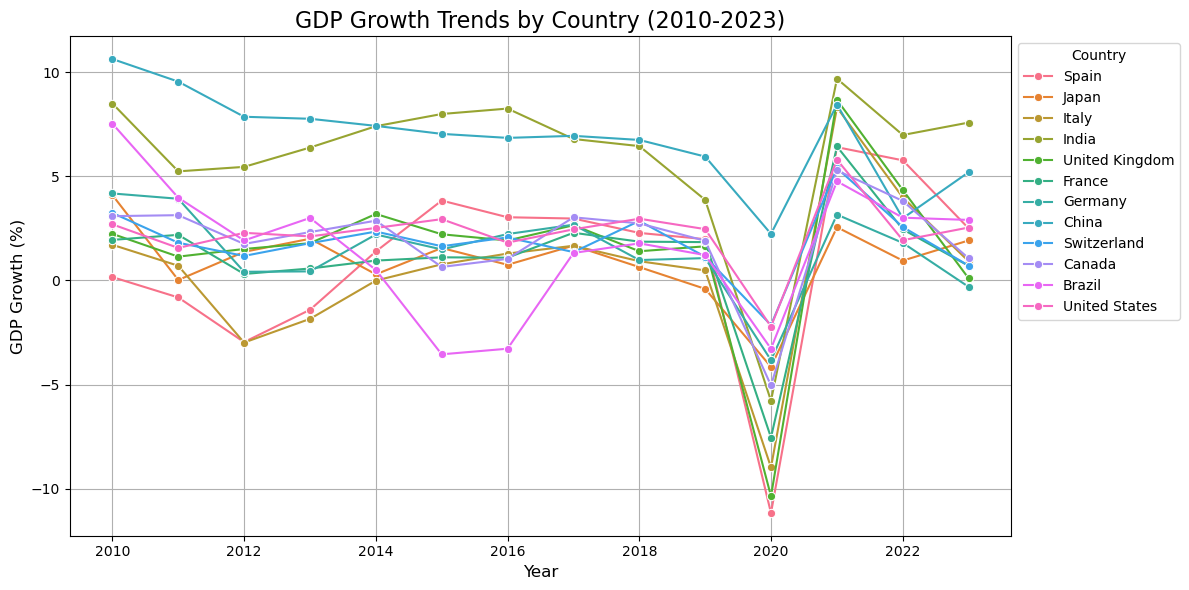

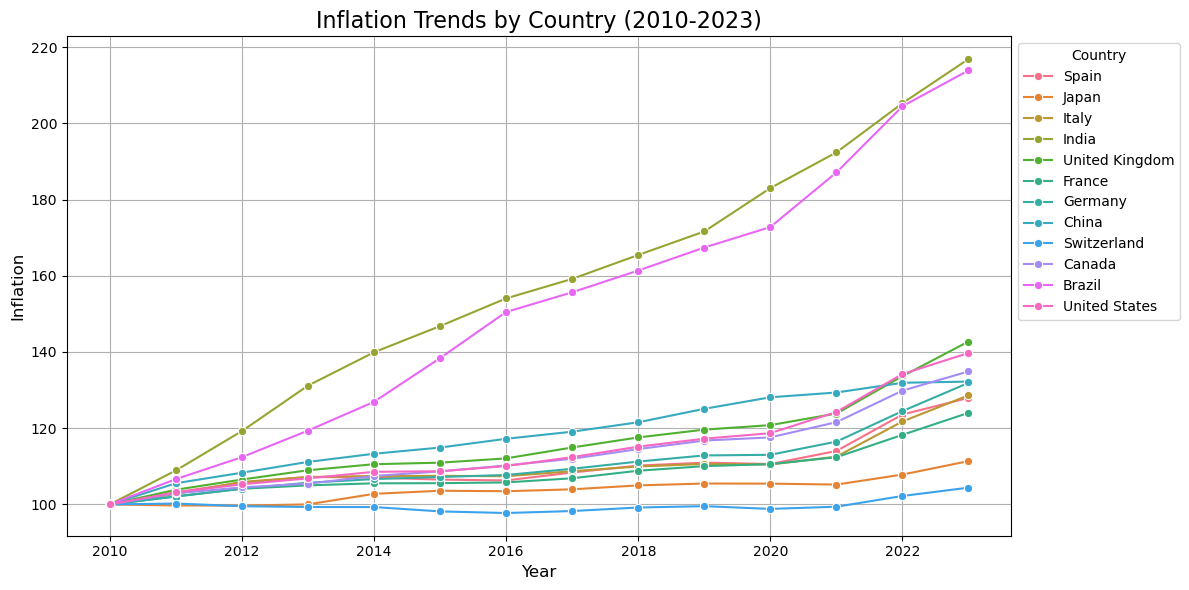

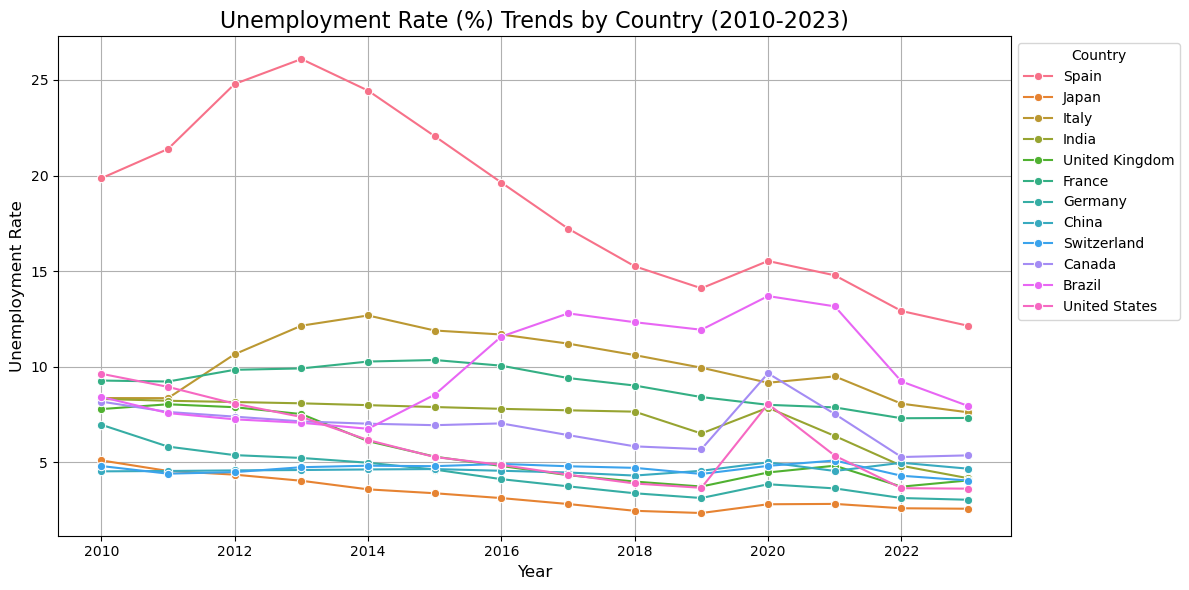

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_macro_trends(data):
    """
    Plot GDP Growth trends for all countries in one graph.
    Args:
        data (pd.DataFrame): Cleaned DataFrame with GDP growth data.
    """
    plt.figure(figsize = (12,6))
    sns.lineplot(data = data, x = 'Date', y = 'GDP Growth Rate %', hue = 'Country', marker = 'o')
    plt.title("GDP Growth Trends by Country (2010-2023)", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("GDP Growth (%)", fontsize=12)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (12,6))
    sns.lineplot(data = data, x = 'Date', y = 'Inflation based on CPI', hue = 'Country', marker = 'o')
    plt.title("Inflation Trends by Country (2010-2023)", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Inflation", fontsize=12)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (12,6))
    sns.lineplot(data = data, x = 'Date', y = 'Unemployment Rate %', hue = 'Country', marker = 'o')
    plt.title("Unemployment Rate (%) Trends by Country (2010-2023)", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Unemployment Rate", fontsize=12)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ensure cleaned_data contains GDP growth for all countries
plot_macro_trends(cleaned_macro_data)

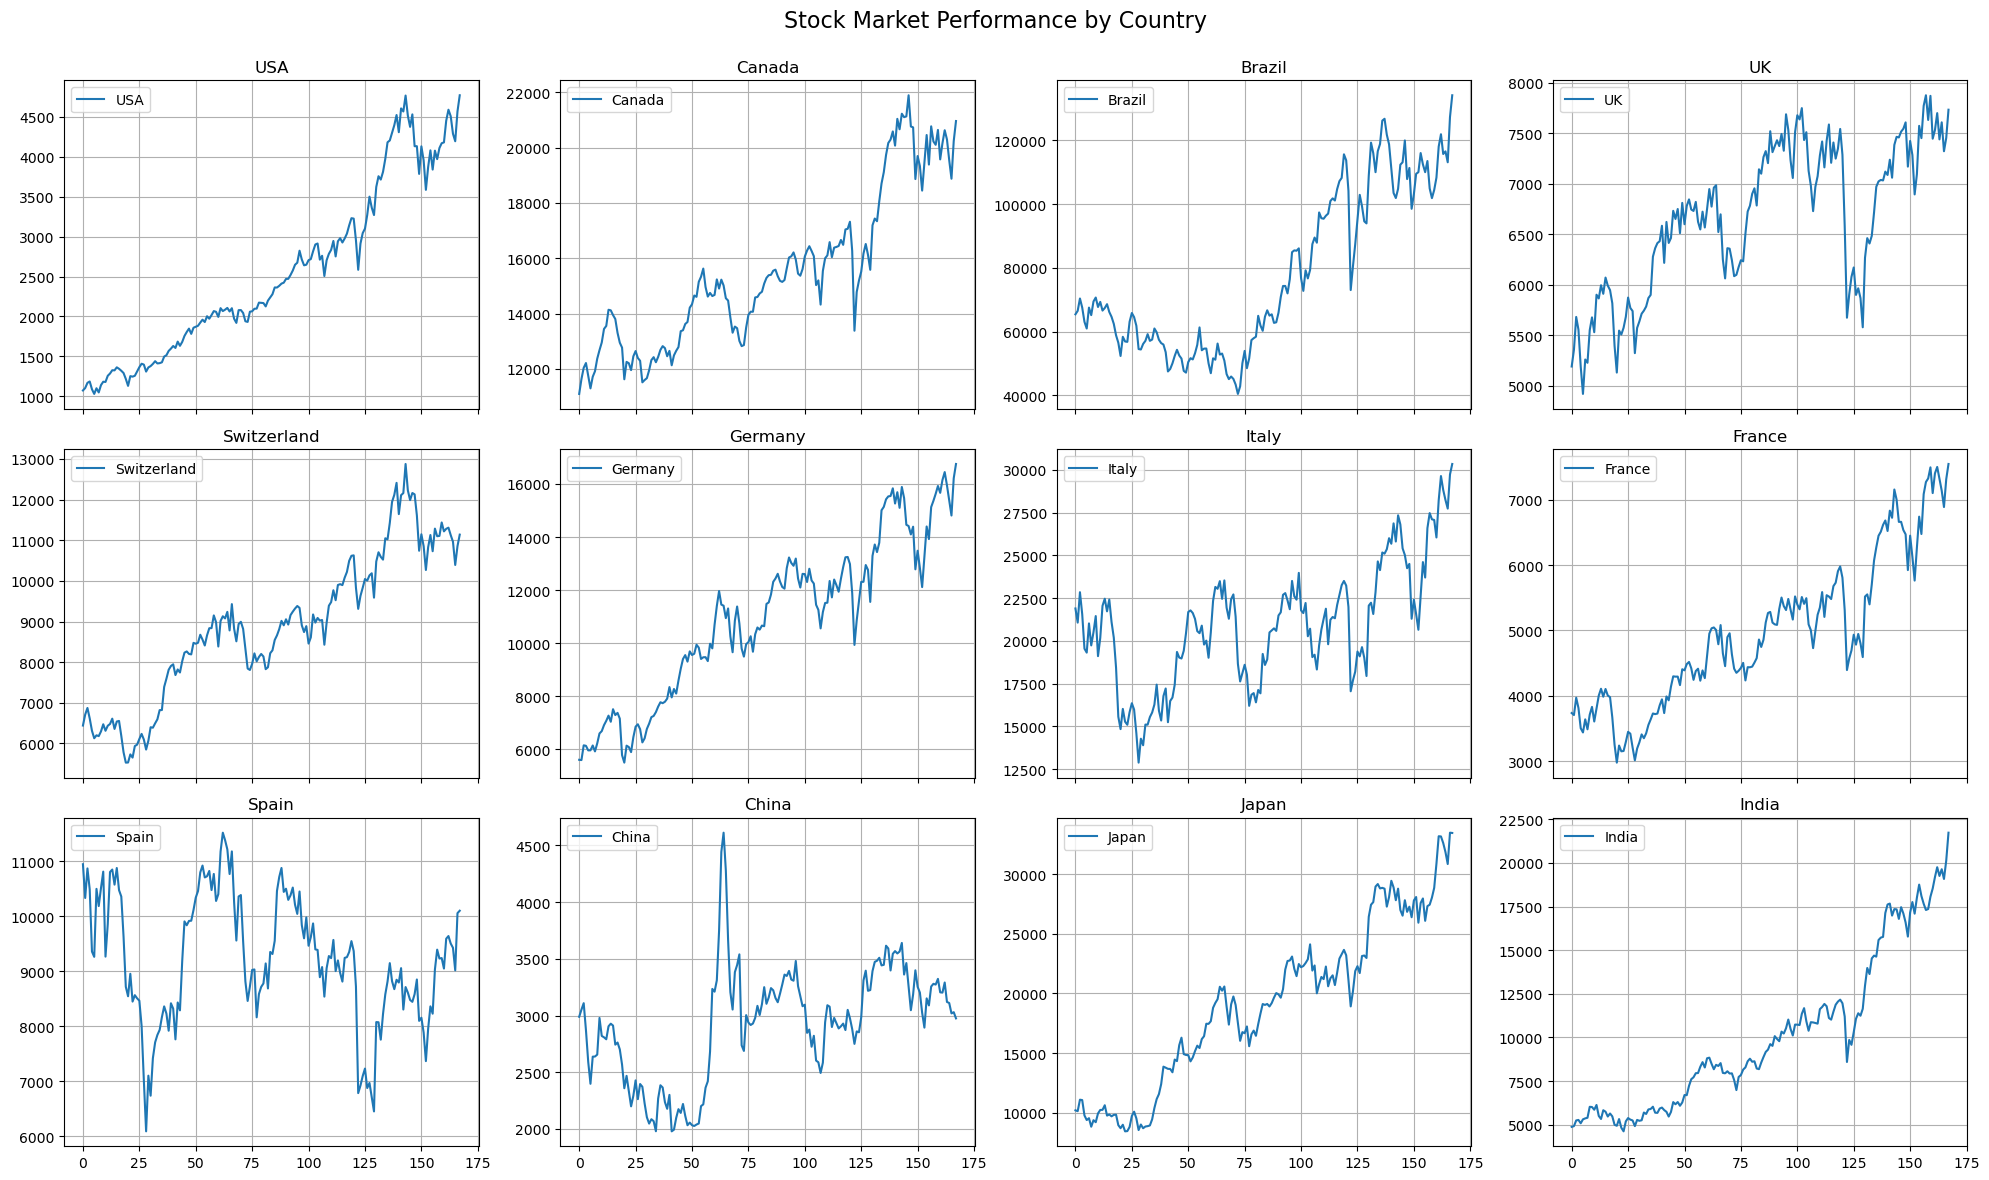

In [19]:
def plot_stock_market_subplots(data):
    """
    Plot stock market performance for each country in subplots.
    Args:
        data (pd.DataFrame): DataFrame containing stock market data.
        title (str): Title of the entire figure.
    """
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True)
    axes = axes.flatten()  # Flatten axes for easier iteration
    # Extract country-specific data
    countries = data.columns
    for i, country in enumerate(countries):
        country_data = data.loc[:,country]
        # Plot data on its respective subplot
        axes[i].plot(country_data.index, country_data, label=country)
        axes[i].set_title(country, fontsize=12)
        axes[i].grid(True)
        axes[i].legend(loc="upper left", fontsize=10)
        # Adjust layout and add a main title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle("Stock Market Performance by Country", fontsize=16)
    plt.show()

# Ensure the stock data contains cleaned close price columns
plot_stock_market_subplots(stock_data_combined)

### Conclusion

- The code covers fetching, cleaning, and visualizing both macroeconomic and stock market data for insightful analysis.
- By following the provided code, users can effectively analyze and compare financial data from different countries and indicators.

This documentation provides a comprehensive guide to understanding and implementing financial data analysis in Python.
